##### This code aims to solely calculate the average, max, and min range of price change in GBPUSD for the past 5 years, and plot these changes.

In [44]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
gbpusd=yf.Ticker("GBPJPY=X")
data=gbpusd.history(start="2020-01-01", end="2025-01-17")
data=data.reset_index()
data=pd.DataFrame(data)
new_data=data.drop(["Open","Close","Volume","Dividends","Stock Splits"],axis=1)
print(new_data)


                          Date        High         Low
0    2020-01-01 00:00:00+00:00  145.307236  144.009995
1    2020-01-02 00:00:00+00:00  144.169006  142.276001
2    2020-01-03 00:00:00+00:00  142.737000  141.022995
3    2020-01-06 00:00:00+00:00  142.729004  141.119995
4    2020-01-07 00:00:00+00:00  143.272995  142.033997
...                        ...         ...         ...
1311 2025-01-10 00:00:00+00:00  194.759995  192.209000
1312 2025-01-13 00:00:00+00:00  192.744003  190.108994
1313 2025-01-14 00:00:00+00:00  192.834000  191.554993
1314 2025-01-15 00:00:00+00:00  192.960007  191.182999
1315 2025-01-16 00:00:00+00:00  191.503006  189.804001

[1316 rows x 3 columns]


In [46]:
high=new_data["High"]
low=new_data["Low"]
high=np.array(high)
low=np.array(low)
range_=high-low
avg_range=(range_.mean()*100).round(2)
max_range=(range_.max()*100).round(2)
min_range=(range_.min()*100).round(2)
print(f"average range is {avg_range} pips")
print(f"max range is {max_range} pips")
print(f"min range is {min_range} pips")

average range is 137.92 pips
max range is 802.4 pips
min range is 26.0 pips


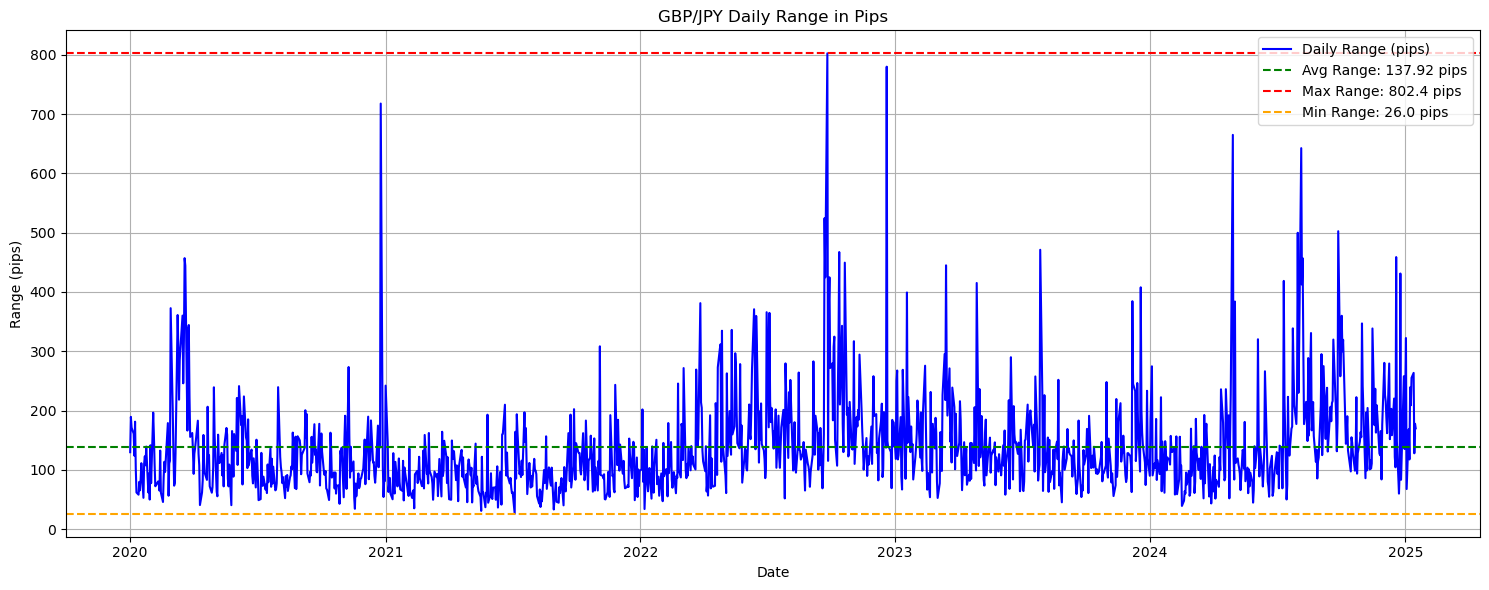

In [47]:
new_data['Range'] = new_data['High'] - new_data['Low']
new_data['Range_pips'] = new_data['Range'] * 100  # Convert to pips

# Plot the daily range
plt.figure(figsize=(15, 6))
plt.plot(new_data['Date'], new_data['Range_pips'], label='Daily Range (pips)', color='blue')

# Plot horizontal lines for avg, max, and min ranges
plt.axhline(avg_range, color='green', linestyle='--', label=f'Avg Range: {avg_range} pips')
plt.axhline(max_range, color='red', linestyle='--', label=f'Max Range: {max_range} pips')
plt.axhline(min_range, color='orange', linestyle='--', label=f'Min Range: {min_range} pips')

# Formatting
plt.title('GBP/JPY Daily Range in Pips')
plt.xlabel('Date')
plt.ylabel('Range (pips)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()